# Chess data set analysis

## Summary

<b>Introduction</b>

<b>First analysis</b>

    a)Distribution of the victories
    b)Types of victory
    c)Openings
    d)Ratings
    
<b>Courious facts</b>

    1)There are not 2 equal games
    2)Most usual first move
    3)Draw games not caused by draw
    4)Distribution of playes rating
    
<b>Analysis</b>

    a)Rated and non-rated games
        -How being rated affects to the victory
        -How being rated affects to the cause of victory
    b)Average rating
        -How the average rating afects cause of victory
        -How the number of turns and moves in the opening evolves with rating
    c)Difference in rating between players
        -How difference in rating affects winrate
        -How difference of rating affects the cause of victory
        -How rating difference between players affects the number of total turns and movements in the opening

## Introduction

We are going to analyze Chess Game Dataset (Lichess) from Kaggle (https://www.kaggle.com/datasnaek/chess). This dataset contains information about the games of the members of the top 100 chess teams on Lichess.

In [237]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy.stats import norm

plt.style.use('ggplot')

In [213]:
small_size = 14
medium_size = 16
big_size = 20

plt.rc('font', size=small_size)          
plt.rc('axes', titlesize=small_size)    
plt.rc('axes', labelsize=medium_size)    
plt.rc('xtick', labelsize=small_size)    
plt.rc('ytick', labelsize=small_size)    
plt.rc('legend', fontsize=small_size)    
plt.rc('figure', titlesize=big_size)

In [3]:
chess=pd.read_csv('games.csv')
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


As we can see, every column has the same number of non-null entries (20058), which is the total number of games in the dataset. This means that the dataset is complete and we don´t need to worry about missing data.

The id of the game provides us useless information, because we can identify each game with its own unique index in the dataframe. I will also delete the start and ending times of the games because they are written in seconds since the creation of the web, and in most of the cases when we try to calculate the total time of the game is just 0 or 100000. Furthermore, we are not going to work with players id, because they don´t provide too much information related with the game itself. Players id could be used to analyze how much games do a person plays, or, for example, to 


In [4]:
chess=chess.drop(['id','created_at', 'last_move_at', 'white_id', 'black_id'], axis=1)

In [5]:
chess.head()

rated  turns victory_status winner increment_code  white_rating  \
0  False     13      outoftime  white           15+2          1500   
1   True     16         resign  black           5+10          1322   
2   True     61           mate  white           5+10          1496   
3   True     61           mate  white           20+0          1439   
4   True     95           mate  white           30+3          1523   

   black_rating                                              moves  \
0          1191  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1          1261  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2          1500  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3          1454  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4          1469  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   

  opening_eco                            opening_name  opening_ply  
0         D10        Slav Defense: Exchange Variation            5  
1         B00  Nimzowitsch Defense: Kennedy Variation            4  
2         C20   King's Pawn Game: Leonardis Variation            3  
3         D02  Queen's Pawn Game: Zukertort Variation            3  
4         C41                        Philidor Defense            5

In [6]:
chess.describe()

turns  white_rating  black_rating   opening_ply
count  20058.000000  20058.000000  20058.000000  20058.000000
mean      60.465999   1596.631868   1588.831987      4.816981
std       33.570585    291.253376    291.036126      2.797152
min        1.000000    784.000000    789.000000      1.000000
25%       37.000000   1398.000000   1391.000000      3.000000
50%       55.000000   1567.000000   1562.000000      4.000000
75%       79.000000   1793.000000   1784.000000      6.000000
max      349.000000   2700.000000   2723.000000     28.000000

In [7]:
len(chess)

20058

## First analysis

### Distribution of the victories

In [8]:
wins=100*chess['winner'].value_counts()/len(chess)
print(wins)

white    49.860405
black    45.403330
draw      4.736265
Name: winner, dtype: float64


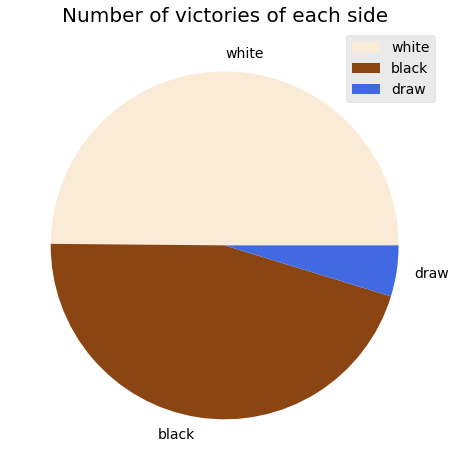

In [338]:
chess['winner'].value_counts().plot(kind='pie', figsize=(8,8) , legend=True, ylabel='', colors=['antiquewhite','saddlebrown', 'royalblue'])
plt.title('Number of victories of each side', fontsize=20)
plt.show()

As we can see, white player tend to win more than black player. In particular, white player tends to win 49,86% of the games, while black player wins 45,40%, and the 4,74% of remaining games ends in draw. 

### Types of victory

As we can see, the column victory_status in chess dataframe shows us the reason of the victory. Let´s see which values it contains:

In [10]:
chess['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

So, there are 4 possible causes for the end of a game: resign, mate, out of time and draw. We will be interested in see how the victory status changes according to other factors such as the rating of the player in the game.

### Openings

The dataset provide us also the opening that players used in the game, with its own code and name. It is possible to see the correspondance between opnening codes and names in the following webpage: https://www.365chess.com/eco.php .  

In [11]:
openings=chess['opening_eco'].value_counts()
print(len(openings))

365


As we can see, there are 365 different openings in the games from the dataset. Let's see the 20 openings that were more common in the games.

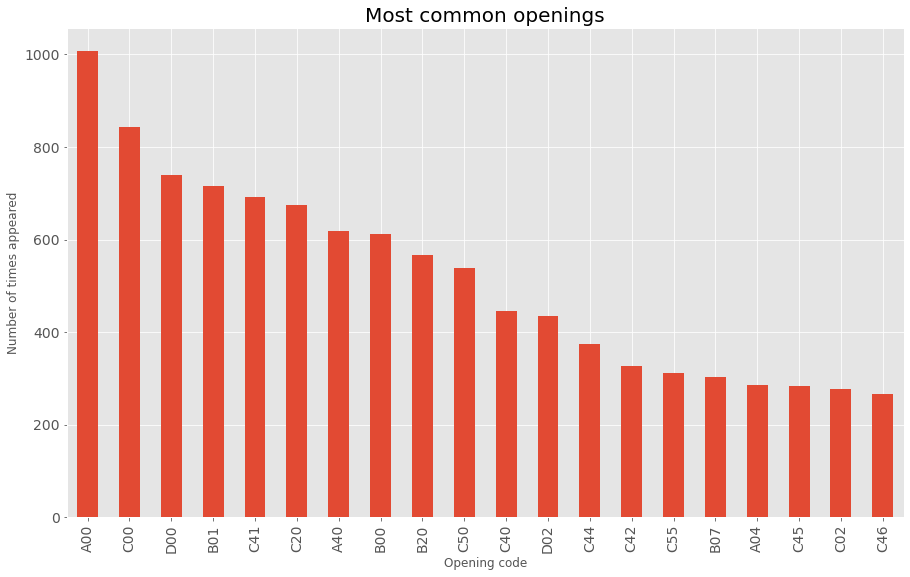

In [333]:
openings[:20].plot(kind='bar', figsize=(15,9), xlabel='Opening code', ylabel='Number of times appeared')
plt.title('Most common openings', fontsize=20)
plt.show()

The opening that was used in more games is the one with the code A00, which belongs to Polish (Sokolsky) opening, which starts with b4.

### Ratings

The dataset provides us the rating from white and black players in each game. This is usefull to compare different properties of each game depending of how good both players are. We should expect that the variables white_rating and black_rating have a high correlation between them, and that would be a synthom of a good match-making in the webpage. 

In [13]:
corr_ratings=chess['white_rating'].corr(chess['black_rating'])
print(corr_ratings)

0.6341707768853491


However, if we check the correlation, we obtain that it is 0.63417, which moderate correlation. This show us that there are some games with high rating difference between player. We can see this in the next plot, in which there are represented the rating of both players of every game:

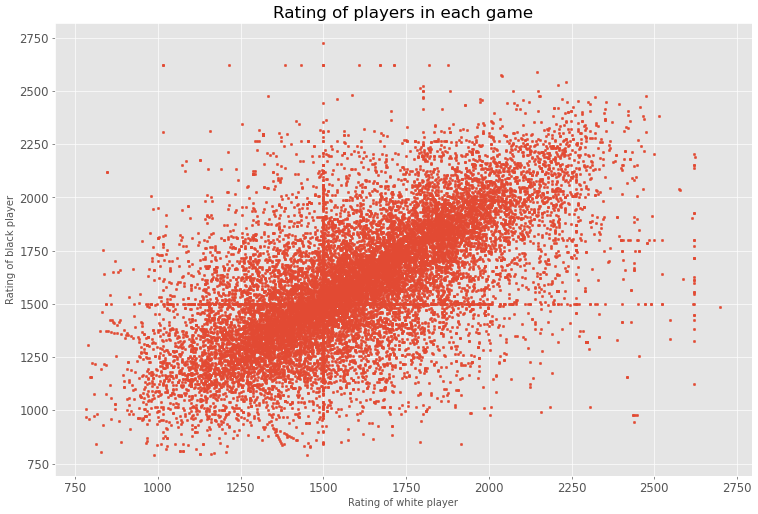

In [334]:
plt.figure(figsize=(15,10), dpi=60)
plt.scatter(chess['white_rating'], chess['black_rating'], marker=".")
plt.xlabel('Rating of white player')
plt.ylabel('Rating of black player')
plt.title('Rating of players in each game', fontsize=20)
plt.show()

This observation is verty interesting, because it allows us to study how the games change depending on the difference of rating between both players.

## Courious facts

#### 1) There are not 2 games equal

To check it, my first idea is to see how many unique moves strings are in the dataframe.

In [403]:
unique_moves=chess['moves'].unique().tolist()
print(len(unique_moves))

18920


It seems there are more than 1100 games repeated, at least in pairs. But, as I know the possible combinations of chess games, this sounds really strange to me, so I check it by myself with the next code:

In [ ]:
unique_moves.sort()

count_move=[]
index_move=[]

j=-1
for k in range(1, len(unique_moves)):
    if unique_moves[k]==unique_moves[k-1]:
        if unique_moves[k]!=unique_moves[k-2]:
            index_move.append(unique_moves[k])
            count_moves.append(2)
            j=j+1
        else:
            count_first_move[j]=count_first_move[j]+1
print(index_move)
print(count_move)

So, there aren't 2 games with the exact same movements. I don't know why print(len(unique_moves)) shows a number minor than len(chess).

#### 2) Most usual first move

Let's analyze which is the first move that players tend to use more.

In [299]:
moves=chess['moves']
first_move=list()
for move in moves:
    first_move.append(move.split()[0])
first_move.sort()

#As we needed to split, we do not have a dataframe, so we cannot use .unique method
count_first_move=[0]
index_first_move=[]

j=0
for k in range(0, len(first_move)):
    if k==0:
        index_first_move.append(first_move[k])
        count_first_move[j]=count_first_move[j]+1
    else:
        if first_move[k]==first_move[k-1]:
            count_first_move[j]=count_first_move[j]+1
        else:
            j=j+1
            index_first_move.append(first_move[k])
            count_first_move.append(1)
            
print('The most usual first move is '+str(index_first_move[count_first_move.index(max(count_first_move))]))

The most usual first move is e4


As we can see, the usualest first movement in all game is e4. This does not match with the most common opening, that we said it is Polish opening, with starts with b4. But, if we check the opening list, we can realise that not all variants of that opening start with the movement e4. Furthermore, a lot of openings start with e4, so that is why it is the most common first movement. 

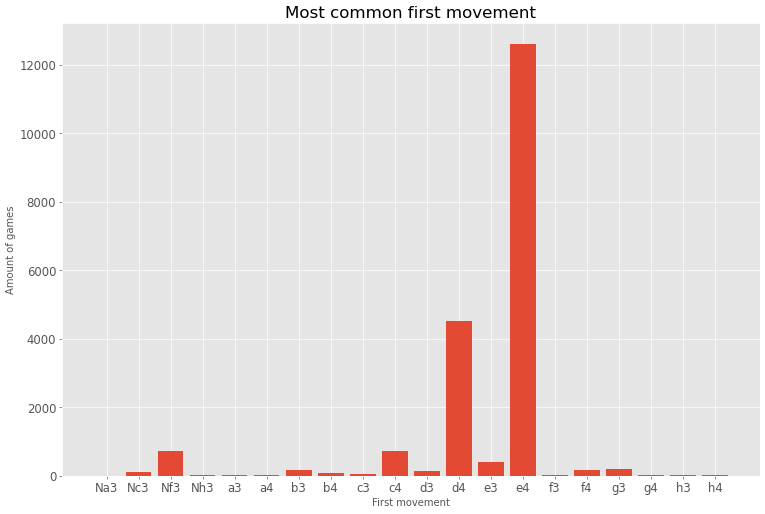

In [336]:
plt.figure(figsize=(15,10), dpi=60)
plt.bar(index_first_move, count_first_move)
plt.xlabel('First movement')
plt.ylabel('Amount of games')
plt.title('Most common first movement', fontsize=20)
plt.show()

#### 3) Draw games not caused by draw

It might sound extrage, but there are some games in the data set which in their column winner appears draw, but the victory stuatus is not draw. Indeed, we can check it:

In [350]:
cont=0
for lab, row in chess.iterrows():
    if row['winner']=='draw' and row['victory_status']!='draw':
#         print(row['victory_status'])
        cont=cont+1
print(cont)

44


We can see that there are 44 games which result is Draw but the cause of ending the game is Out of time. An explanation to this fact can be found in the next article: 
https://support.chess.com/article/268-my-opponent-ran-out-of-time-why-was-it-a-draw


#### 4) Distribution of players rating

We want to check if the rating of the player follows a certain distribution. For this purpose, we first plot the histogram of, for example, the white player rating through all games.

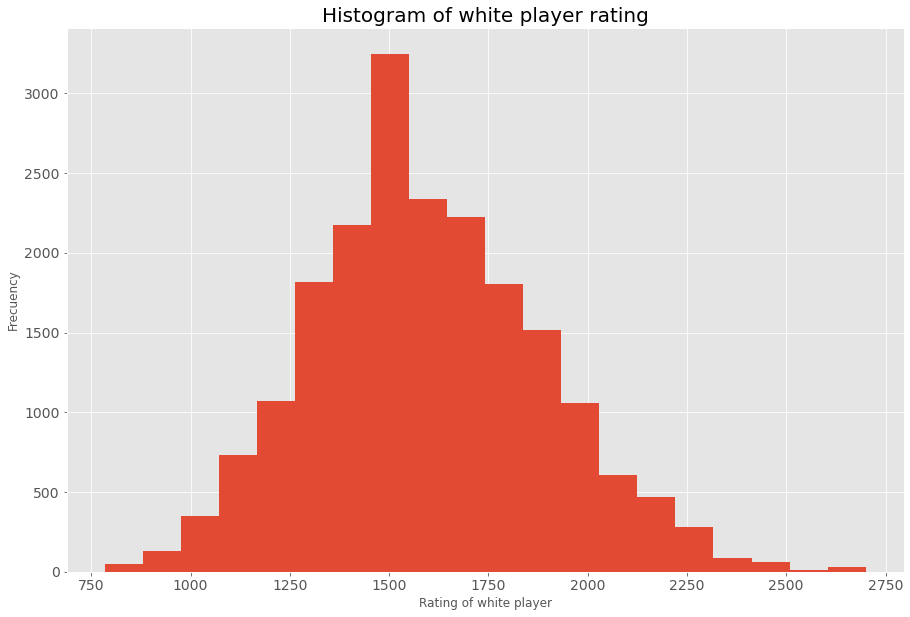

In [342]:
chess.hist(column='white_rating', bins=20, figsize=(15,10))
plt.xlabel('Rating of white player')
plt.ylabel('Frecuency')
plt.title('Histogram of white player rating', fontsize=20)
plt.show()

In the first sight, it seems to be a normal distribution. Let's check graphically if we are right or not. 

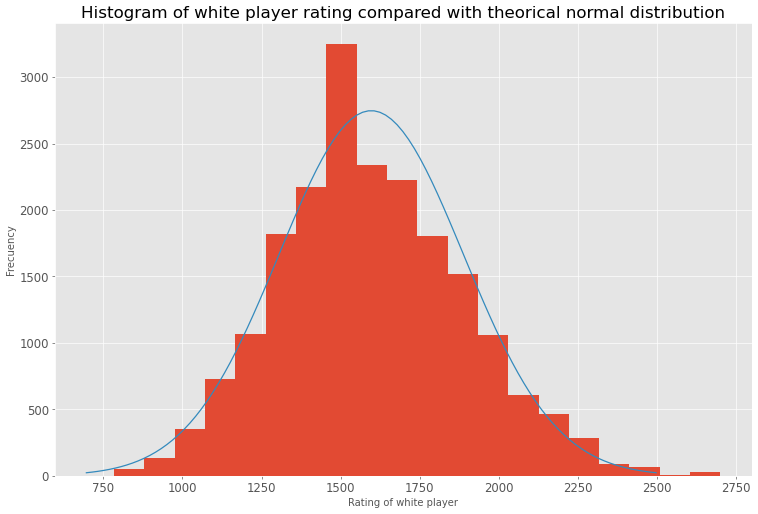

In [345]:
plt.figure(figsize=(15,10), dpi=60)
white_rating=chess['white_rating']
plt.hist(white_rating, bins=20)

media, sd=norm.fit(white_rating)

x = np.linspace(norm(media,sd).ppf(0.001), norm(media, sd).ppf(0.999), 100)
fdd=100*len(chess)*norm(media, sd).pdf(x)
plt.plot(x, fdd)

plt.xlabel('Rating of white player')
plt.ylabel('Frecuency')
plt.title('Histogram of white player rating compared with theorical normal distribution', fontsize=20)
plt.show()

It seems to be similar. But, to more precise comparison, we can represent de q-q plot, which compares the quantiles of the theorical distribution with the quantiles of our data:

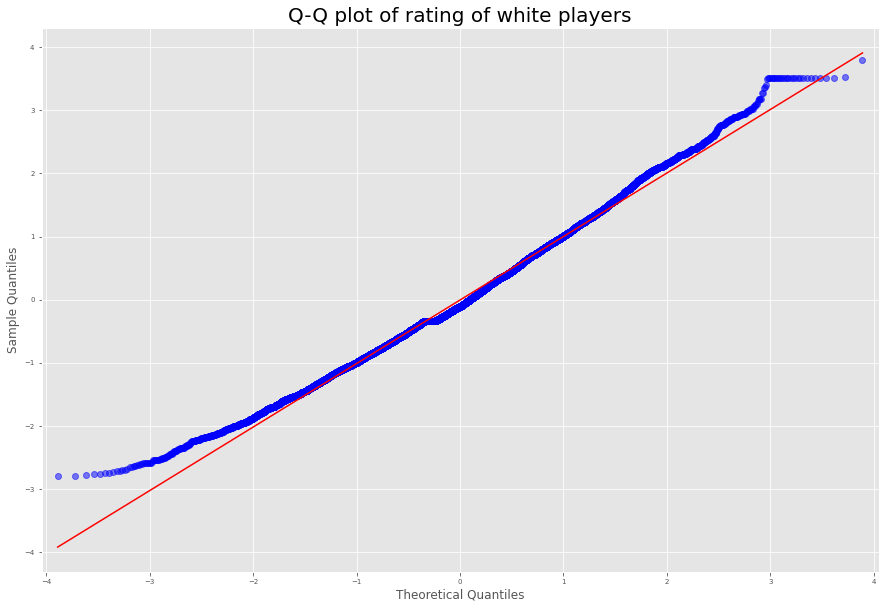

In [337]:
fig, ax = plt.subplots(figsize=(15,10))
sm.qqplot(white_rating, fit=True, line='q', alpha=0.5, lw=2, ax=ax)
ax.set_title('Q-Q plot of rating of white players', fontsize = 20)
ax.tick_params(labelsize = 7)

As it approaches to the straight line, we know that white player rating distribution approaches to follow a normal distribution. To make sure of this fact, we should do a hypothesis contrast of normality.

## Analysis

Now we want to select a few features and see how they influence in the result and characteristics of every game. I will select: if the games is rated or not, the average rating of the players in the game and the difference of rating between players.

### Rated and non-rated games

#### How being rated affects to the victory

The column rated of the dataframe tells us if the players in the game will win or lose rating points depending on the result of the game. Seems reasonable to assume that players will take rated games more seriously than non-rated games; so, we will analyze if the fact that a game is rated influences the victory or not.

In [17]:
rated_grouped=chess.groupby(['rated'])
rated_grouped.mean()

turns  white_rating  black_rating  opening_ply
rated                                                    
False  54.271586   1594.685883   1569.497310     4.827825
True   61.962550   1597.102012   1593.503188     4.814361

In first place, we can see that rated games have, on average, more turns than non-rated games, fact which matches with the assumption that players will try to win with more effort on rated-games.

We are going to analyze if winrate of white and black players changes between rated and non-rated games.

In [372]:
winner_rated_groups=chess.groupby(['rated', 'winner'])
winner_rated_groups.size()

rated  winner
False  black     1723
       draw       231
       white     1949
True   black     7384
       draw       719
       white     8052
dtype: int64

In [373]:
winner=chess['winner'].unique().tolist()
victory_rated=np.zeros(( len(winner), 2 ), dtype=int)

for i in range(0, len(winner) ) :
    for k in range(0, 2):
        victory_rated[i,k]=winner_rated_groups.size()[k][i]
# print (victory_rated)

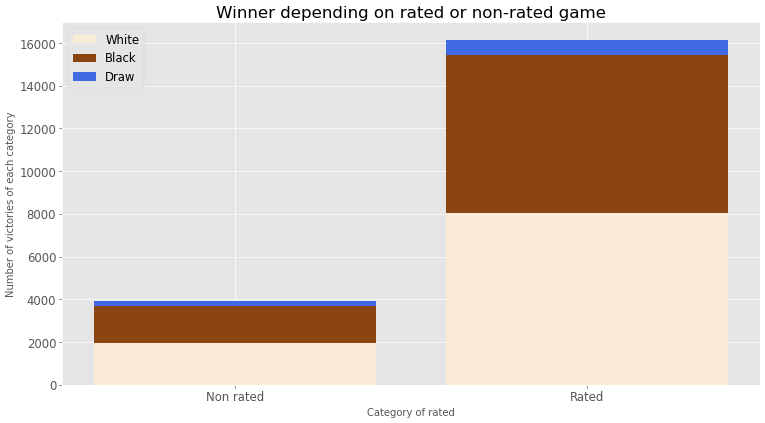

In [375]:
index_rated=['Non rated', 'Rated']

plt.figure(figsize=(15,8), dpi=60)
plt.bar(index_rated, victory_rated[2,:], label='White', color='antiquewhite')
plt.bar(index_rated, victory_rated[0,:], label='Black', color='saddlebrown', bottom=victory_rated[2,:])
plt.bar(index_rated, victory_rated[1,:], label='Draw', color='royalblue', bottom=victory_rated[2,:]+victory_rated[0,:])

plt.xlabel('Category of rated')
plt.ylabel('Number of victories of each category')
plt.legend()
plt.title('Winner depending on rated or non-rated game', fontsize=20)
plt.show()

Let's see it in relative terms, to compare properly if the percentages of victory change.

[[0.44145529 0.45707211]
 [0.05918524 0.04450634]
 [0.49935947 0.49842154]]


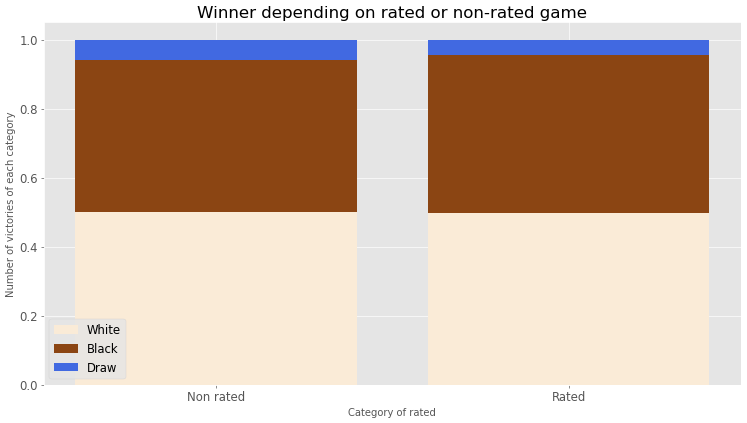

In [376]:
total_rated=list(rated_grouped.size())
prop_victory_rated=victory_rated/total_rated
print(prop_victory_rated)

plt.figure(figsize=(15,8), dpi=60)
plt.bar(index_rated, prop_victory_rated[2,:], label='White', color='antiquewhite')
plt.bar(index_rated, prop_victory_rated[0,:], label='Black', color='saddlebrown', bottom=prop_victory_rated[2,:])
plt.bar(index_rated, prop_victory_rated[1,:], label='Draw', color='royalblue', bottom=prop_victory_rated[2,:]+prop_victory_rated[0,:])

plt.xlabel('Category of rated')
plt.ylabel('Number of victories of each category')
plt.legend()
plt.title('Winner depending on rated or non-rated game', fontsize=20)
plt.show()

plt.show()

It is possible to see (both in the graph and in prop_victory_rated) that, despite the fact that white player win percentage is quite similar in rated and non-rated games, the black player win percentage increases in rated games. Also, draw games are less common in rated games.

####  How being rated affects to the cause of victory

Let's see now how the fact of being rated afect at the victory status of a game. 


In [22]:
chess.groupby(['rated' , 'victory_status']).size()

rated  victory_status
False  draw               225
       mate              1179
       outoftime          321
       resign            2178
True   draw               681
       mate              5146
       outoftime         1359
       resign            8969
dtype: int64

In [23]:
victory_status_rated=np.zeros((4, len(rated_grouped)), dtype=int)
# 0:resign,  1:mate, 2:outoftime , 3:draw

for k, row in chess.iterrows():
    a=int(row['rated'])
    
    if row['victory_status']=='resign':
        victory_status_rated[0,a]=victory_status_rated[0,a]+1
    elif row['victory_status']=='mate':
        victory_status_rated[1,a]=victory_status_rated[1,a]+1
    elif row['victory_status']=='outoftime':
        victory_status_rated[2,a]=victory_status_rated[2,a]+1
    else:
        victory_status_rated[3,a]=victory_status_rated[3,a]+1
print(victory_status_rated)

[[2178 8969]
 [1179 5146]
 [ 321 1359]
 [ 225  681]]


[[0.55803228 0.55518415]
 [0.30207533 0.31853915]
 [0.08224443 0.08412256]
 [0.05764796 0.04215413]]


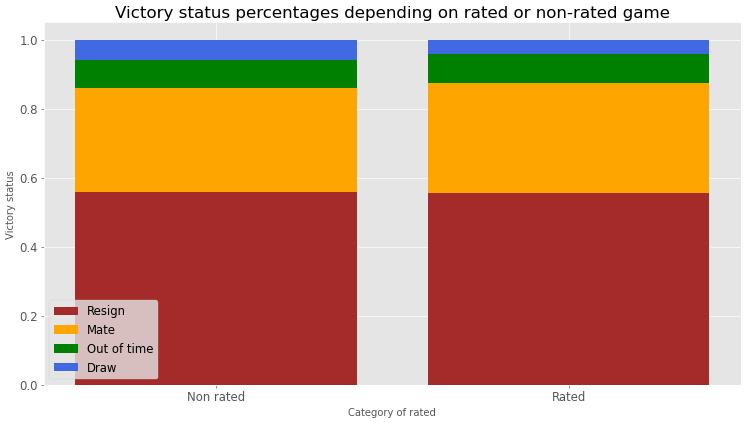

In [245]:
prop_victory_status_rated=victory_status_rated/total_rated
print(prop_victory_status_rated)

plt.figure(figsize=(15,8), dpi=60)
plt.bar(index_rated, prop_victory_status_rated[0,:], label='Resign', color='brown')
plt.bar(index_rated, prop_victory_status_rated[1,:], label='Mate', color='orange', bottom=prop_victory_status_rated[0,:])
plt.bar(index_rated, prop_victory_status_rated[2,:], label='Out of time', color='green', bottom=prop_victory_status_rated[1,:]+prop_victory_status_rated[0,:])
plt.bar(index_rated, prop_victory_status_rated[3,:], label='Draw', color='royalblue', bottom=prop_victory_status_rated[2,:]+prop_victory_status_rated[1,:]+prop_victory_status_rated[0,:])

plt.xlabel('Category of rated')
plt.ylabel('Victory status')
plt.legend()
plt.title('Victory status percentages depending on rated or non-rated game', fontsize=20)
plt.show()

plt.show()

The only difference I can appreciate is that in rated games there are a little more mates than in non-rated games and a little less games which end in draw.

### Average rating

Now we are going to study how the rating of the players of a game affects the characteristic of that game. For that purpose, we will work with the average rating of the players of a game, which gives us an idea of how skilled is that game. So, we define the average raing of a game and we divide in groups.

In [ ]:
chess['avg_rating']=(chess['white_rating']+chess['black_rating'])/2

chess['avg_rating_groups']=round(chess['avg_rating']/100)*100
chess.loc[abs(chess.avg_rating)<900, 'avg_rating_groups']=900    #to avoid groups with few elements
chess.loc[abs(chess.avg_rating)>2400, 'avg_rating_groups']=2400

#### How the average rating afects cause of victory

We want to study if the average rating of the game affects to the victory status.

In [174]:
avg_rating_vic_grouped=chess.groupby(['avg_rating_groups', 'victory_status'])
# avg_rating_vic_grouped.size()
# avg_rating_vic_grouped.mean()
victory_status=chess['victory_status'].unique().tolist()

In [310]:
avg_rating_groups=chess['avg_rating_groups'].unique().tolist()
avg_rating_groups.sort()

causes_victory_avg_groups=np.zeros(( len(victory_status) , len(avg_rating_groups) ), dtype=int)

for i in range(0, len(victory_status) ) :
    for k in avg_rating_groups:
        causes_victory_avg_groups[i, int(k/100-9)]=avg_rating_vic_grouped.size()[k][i]
# print (causes_victory_avg_groups)

In [27]:
#JUST ANOTHER WAY OF DOING THE SAME (without using pandas)
# causes_victory_avg_groups=np.zeros((4, len(avg_rating_groups)), dtype=int)
# # 0:resign,  1:mate, 2:outoftime , 3:draw
# for k, row in chess.iterrows():
#     a=int(row['avg_rating_groups']/100-9)
    
#     if row['victory_status']=='draw':
#         causes_victory_avg_groups[0,a]=causes_victory_avg_groups[0,a]+1
#     elif row['victory_status']=='mate':
#         causes_victory_avg_groups[1,a]=causes_victory_avg_groups[1,a]+1
#     elif row['victory_status']=='outoftime':
#         causes_victory_avg_groups[2,a]=causes_victory_avg_groups[2,a]+1
#     else:
#         causes_victory_avg_groups[3,a]=causes_victory_avg_groups[3,a]+1
# # print(causes_victory_avg_groups)

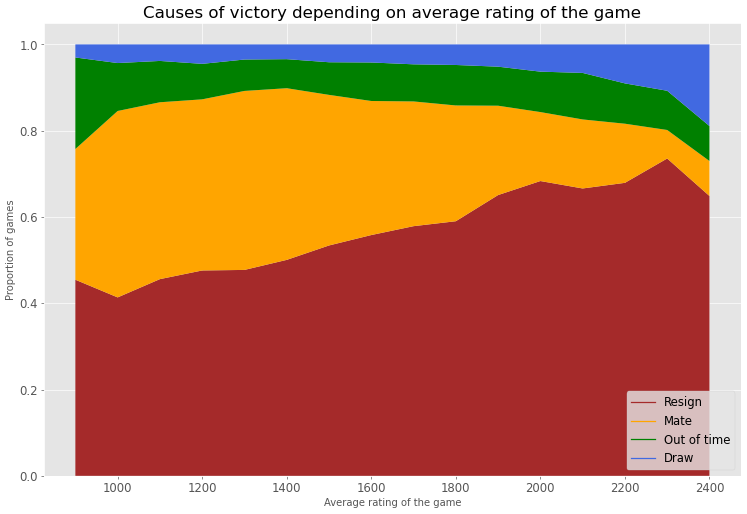

In [247]:
total_avg_groups=list(map(sum, zip(*causes_victory_avg_groups)))
prop_causes_victory_avg_groups=causes_victory_avg_groups/total_avg_groups

plt.figure(figsize=(15,10), dpi=60)
           
plt.plot([], [], color ='brown', label ='Resign')
plt.plot([], [], color ='orange', label ='Mate')
plt.plot([], [], color ='green', label ='Out of time')
plt.plot([], [], color ='royalblue', label ='Draw')

plt.stackplot(avg_rating_groups, prop_causes_victory_avg_groups[3,:] , prop_causes_victory_avg_groups[1,:] , prop_causes_victory_avg_groups[2,:], prop_causes_victory_avg_groups[0,:], colors=['brown', 'orange', 'green', 'royalblue'])

plt.xlabel('Average rating of the game')
plt.ylabel('Proportion of games')
plt.legend(loc='lower right')
plt.title('Causes of victory depending on average rating of the game', fontsize=20)
plt.show()

As we can see, the resign reason increases when the average rating of the game also does. This is because when good players know that the game is lost, they just resign instead of keep fighting. Furthermore, it is more difficult to see a mate when players are better, and that reflects also in the graphic.

#### How the number of turns and moves in the opening evolves with rating

In [43]:
avg_rating_grouped=chess.groupby('avg_rating_groups')
avg_rating_grouped.size()

avg_rating_groups
900.0       33
1000.0     162
1100.0     522
1200.0    1021
1300.0    1827
1400.0    2689
1500.0    3240
1600.0    2745
1700.0    2383
1800.0    1908
1900.0    1492
2000.0     982
2100.0     575
2200.0     321
2300.0     121
2400.0      37
dtype: int64

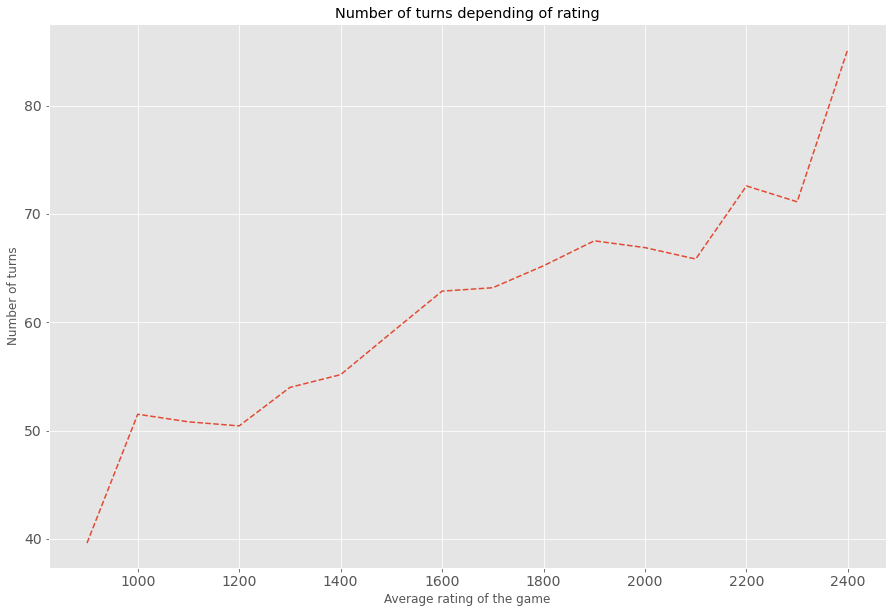

In [382]:
avg_rating_grouped['turns'].mean().plot(figsize=(15,10), linestyle='dashed', xlabel='Average rating of the game', ylabel='Number of turns',title='Number of turns depending of rating')
plt.show()

We can see that when the rating of the players in the game rise, the game tends to have more turns in total. This fits with the fact that when the reting is higher, there are few games that end by mate.  

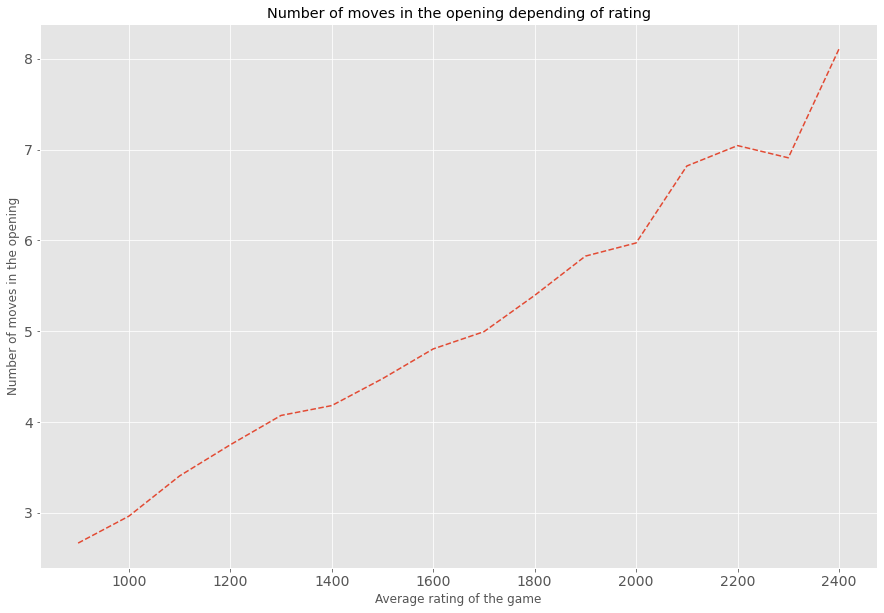

In [383]:
avg_rating_grouped['opening_ply'].mean().plot(figsize=(15,10), linestyle='dashed' , xlabel='Average rating of the game', ylabel='Number of moves in the opening',title='Number of moves in the opening depending of rating')
plt.show()

We can see that when the rating of the players in the game rise, the turns in the opening also increases. This could be explained because players with more rating know better the opening chess theory, so when they play, their movements will fit better to the openings stablished.

### Difference in rating between players

As we did with the average rating, to analyze how difference of rating affects other feaures, we will split the attribute into groups.

In [384]:
chess['dif_rating']=chess['white_rating']-chess['black_rating']

chess['dif_rating_groups']=np.ceil(abs(chess['dif_rating']/50))*50
# chess['rating_difference_groups'][:20]

chess.loc[abs(chess.dif_rating)<5, 'dif_rating_groups']=0
chess.loc[abs(chess.dif_rating)>900, 'dif_rating_groups']=900

#### How difference in rating affects winrate

The first logic question is: how difference of rating affects the winner of the game? To answer this question, we need to figure out that we are not looking for white or black winner, but for in which proportion the player with more raring wins. 

In [50]:
chess['more_rating']=''
chess.loc[chess['dif_rating']<=-5, 'more_rating']='black'
chess.loc[chess['dif_rating']>=5, 'more_rating']='white'
chess.loc[abs(chess['dif_rating'])<5, 'more_rating']='equal'
# chess['more_rating'][:20]

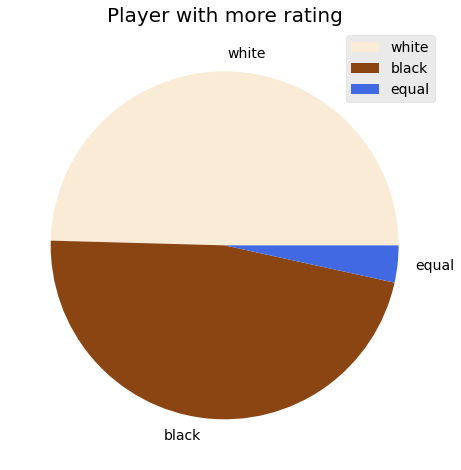

In [380]:
chess['more_rating'].value_counts().plot(kind='pie', figsize=(8,8), legend=True, ylabel='', colors=['antiquewhite','saddlebrown', 'royalblue'] )
plt.title('Player with more rating', fontsize=20)
plt.show()

This plot pie reminds me the proportions of white and black victories in total games. It is easy to see that, if white player rating is usually higher, the white player will tend to win more games.

In [139]:
dif_rating_win_grouped=chess.groupby(['dif_rating_groups'])
dif_rating_win_grouped.size()

dif_rating_groups=chess['dif_rating_groups'].unique().tolist()
dif_rating_groups.sort()
# print(dif_rating_groups)

In [141]:
winner_dif_groups=np.zeros((3, len(dif_rating_groups) ), dtype=int)

for k, row in chess.iterrows():
    a=int(row['dif_rating_groups']/50)
    if a==0:                                  #or, equivalently, if row['more_rating']=='equal'
        if row['winner']=='white':
            winner_dif_groups[0,a]=winner_dif_groups[0,a]+1
        elif row['winner']=='black':
            winner_dif_groups[1,a]=winner_dif_groups[1,a]+1
        elif row['winner']=='draw':
            winner_dif_groups[2,a]=winner_dif_groups[2,a]+1
    else:
        if row['winner']==row['more_rating']:
            winner_dif_groups[0,a]=winner_dif_groups[0,a]+1
        elif row['winner']=='draw':
            winner_dif_groups[2,a]=winner_dif_groups[2,a]+1
        else:
            winner_dif_groups[1,a]=winner_dif_groups[1,a]+1

# print(winner_dif_groups)

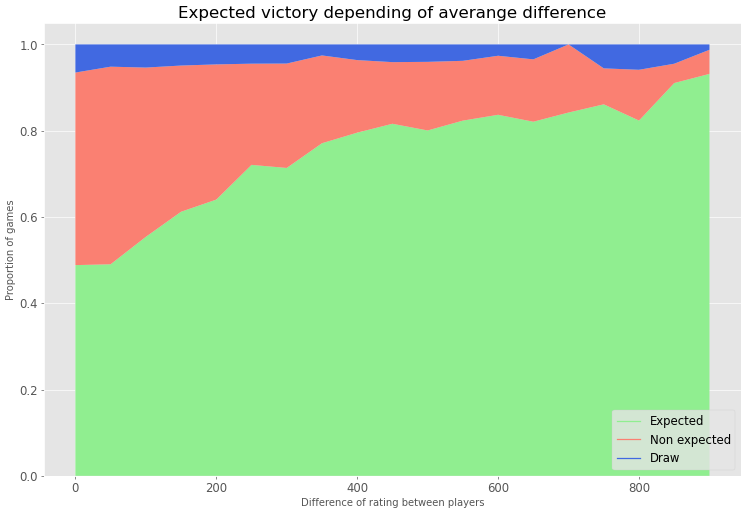

In [394]:
total_dif_groups=list(map(sum, zip(*winner_dif_groups)))
prop_winner_dif_groups=winner_dif_groups/total_dif_groups


plt.figure(figsize=(15,10), dpi=60)
           
plt.plot([], [], color ='lightgreen', label ='Expected')
plt.plot([], [], color ='salmon', label ='Non expected')
plt.plot([], [], color ='royalblue', label ='Draw')

plt.stackplot(dif_rating_groups, prop_winner_dif_groups[0,:] , prop_winner_dif_groups[1,:] , prop_winner_dif_groups[2,:], colors=['lightgreen', 'salmon', 'royalblue'])

plt.xlabel('Difference of rating between players')
plt.ylabel('Proportion of games')
plt.legend(loc='lower right')
plt.title('Expected victory depending of averange difference', fontsize=20)
plt.show()

As it is supposed to be, the ratio of victory of the player with more ratio increases while the difference of rating also increases. We also can notice that the proportion of draw game remains more or less constant.

#### How difference of rating affects the cause of victory 

In [189]:
dif_rating_vic_grouped=chess.groupby(['dif_rating_groups', 'victory_status'])
# dif_rating_vic_grouped.size()

In [181]:
# causes_victory_dif_groups=np.zeros(( len(victory_status) , len(dif_rating_groups) ), dtype=int)

# for i in range(0, len(victory_status) ):
#     for k in dif_rating_groups:
#         causes_victory_dif_groups[i, int(k/50)]=dif_rating_vic_grouped.size()[k][i]
# print (causes_victory_dif_groups)

#It doesn't work because some of dif_rating_vic_grouped.size()[k] has less than 4 element. 
#It is not possible to set an option that sets 0 if it is no label in that category.

In [190]:
causes_victory_dif_groups=np.zeros((4, len(dif_rating_groups)), dtype=int)
# 0:resign,  1:mate, 2:outoftime , 3:draw
for k, row in chess.iterrows():
    a=int(row['dif_rating_groups']/50)
    
    if row['victory_status']=='resign':
        causes_victory_dif_groups[0,a]=causes_victory_dif_groups[0,a]+1
    elif row['victory_status']=='mate':
        causes_victory_dif_groups[1,a]=causes_victory_dif_groups[1,a]+1
    elif row['victory_status']=='outoftime':
        causes_victory_dif_groups[2,a]=causes_victory_dif_groups[2,a]+1
    else:
        causes_victory_dif_groups[3,a]=causes_victory_dif_groups[3,a]+1
# print(causes_victory_dif_groups)

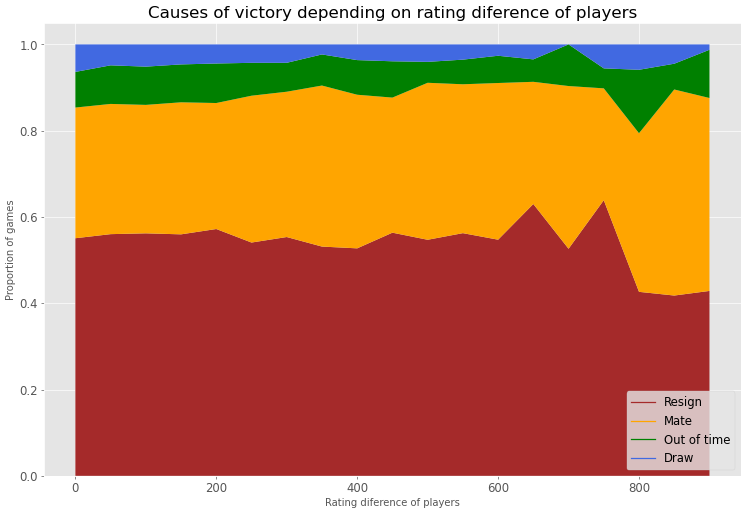

In [248]:
total_dif_groups=list(map(sum, zip(*causes_victory_dif_groups)))
prop_causes_victory_dif_groups=causes_victory_dif_groups/total_dif_groups


plt.figure(figsize=(15,10), dpi=60)
           
plt.plot([], [], color ='brown', label ='Resign')
plt.plot([], [], color ='orange', label ='Mate')
plt.plot([], [], color ='green', label ='Out of time')
plt.plot([], [], color ='royalblue', label ='Draw')

plt.stackplot(dif_rating_groups, prop_causes_victory_dif_groups[0,:] , prop_causes_victory_dif_groups[1,:] , prop_causes_victory_dif_groups[2,:], prop_causes_victory_dif_groups[3,:], colors=['brown', 'orange', 'green', 'royalblue'])

plt.xlabel('Rating diference of players')
plt.ylabel('Proportion of games')
plt.legend(loc='lower right')
plt.title('Causes of victory depending on rating diference of players', fontsize=20)
plt.show()

The most noticeable fact is that when difference in rating between players increases, the rate of games that end with mate also does. Also, resign seems to keep constant, even decresing when difference increases.

#### How rating difference between players affects the number of total turns and movements in the opening

In [191]:
dif_rating_grouped=chess.groupby('dif_rating_groups')
dif_rating_grouped.size()

dif_rating_groups
0.0       690
50.0     4784
100.0    3688
150.0    2653
200.0    1921
250.0    1522
300.0    1149
350.0     860
400.0     660
450.0     511
500.0     371
550.0     368
600.0     190
650.0     173
700.0     114
750.0     108
800.0      68
850.0      67
900.0     161
dtype: int64

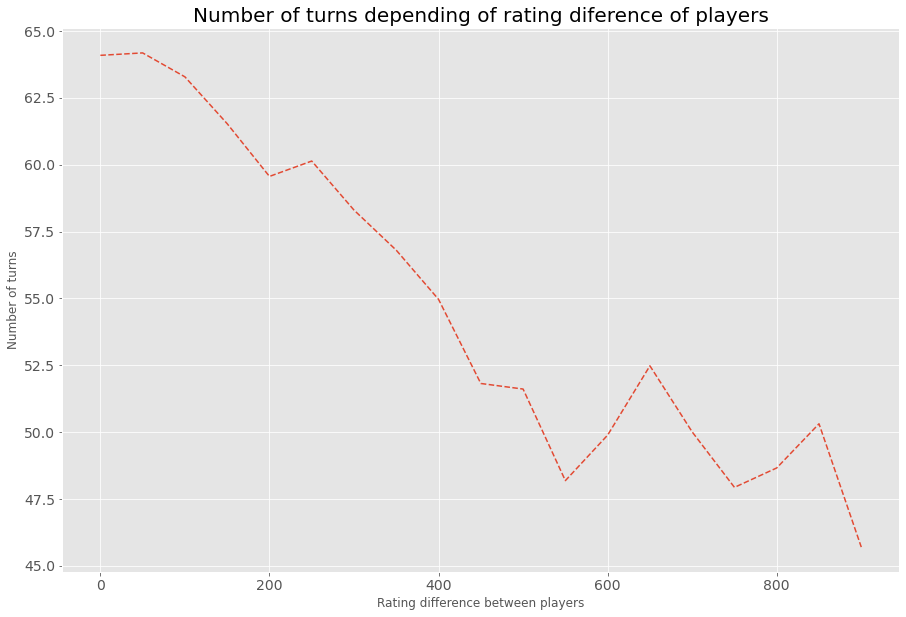

In [395]:
dif_rating_grouped['turns'].mean().plot(figsize=(15,10), linestyle='dashed', xlabel='Rating difference between players', ylabel='Number of turns')
plt.title('Number of turns depending of rating diference of players', fontsize=20)
plt.show()

It is clear that, when rattin difference between players increases, the total number of turns tend to decrease, because it is easier for better players to beat their opponents.

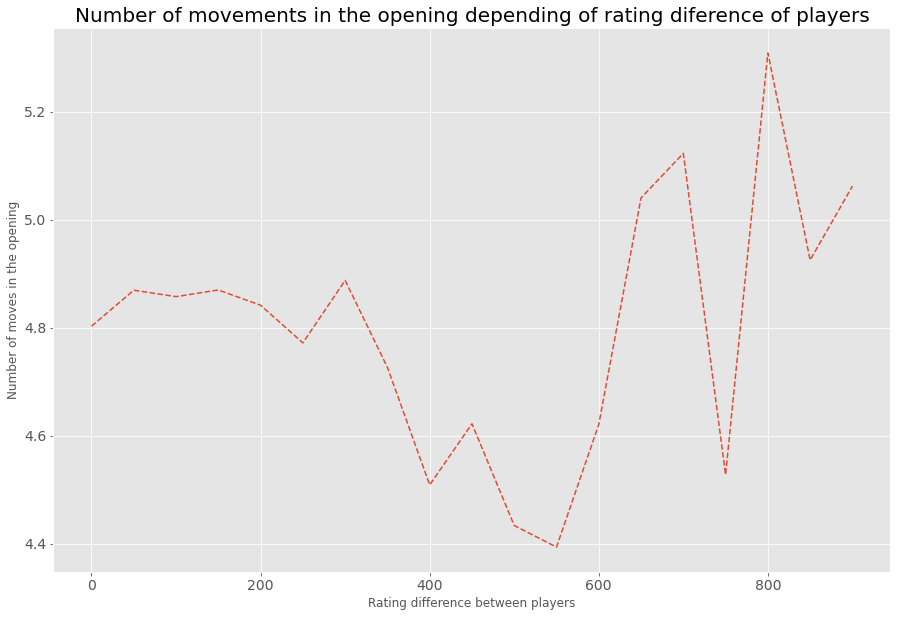

In [396]:
dif_rating_grouped['opening_ply'].mean().plot(figsize=(15,10), linestyle='dashed' , xlabel='Rating difference between players', ylabel='Number of moves in the opening')
plt.title('Number of movements in the opening depending of rating diference of players', fontsize=20)
plt.show()

It is difficult to stablish a relationship.